In [6]:
import numpy as np
from ase.lattice.hexagonal import Graphite
from fireballpy import Fireball
from fireballpy.bands import BandPath

### FOR SPEED ###
#atoms.calc = Fireball(fdata='HCSi', charges_method='mulliken_dipole_preserving', kpts=(4, 4, 4))
#atoms.get_potential_energy()
#atoms.calc.get_shell_charges()
initial_charges = np.array(
       [[1.16147694, 2.72121211, 0.1209701],
       [1.21658876, 2.68450828, 0.09866597],
       [1.18682668, 2.699532  , 0.11053875],
       [1.18663659, 2.70396218, 0.10926534],
       [1.15715   , 2.72251397, 0.12392142],
       [1.18921292, 2.69935765, 0.11143421],
       [1.21426532, 2.68178248, 0.09974014],
       [1.16072821, 2.7193367 , 0.12187093],
       [1.18721639, 2.70232495, 0.11012429],
       [1.15609032, 2.71661573, 0.12505477],
       [1.16398701, 2.71656857, 0.12291926],
       [1.21515849, 2.68654008, 0.09848704],
       [1.21303218, 2.686569  , 0.09749963],
       [1.16063401, 2.71585781, 0.12217373],
       [1.18894826, 2.70061269, 0.11039498],
       [1.18807313, 2.70452174, 0.10914902],
       [1.16141794, 2.72118237, 0.12094779],
       [1.21648623, 2.68447342, 0.09862158],
       [1.18681222, 2.69947445, 0.11058096],
       [1.18667141, 2.70395272, 0.10928735],
       [1.15711135, 2.7224887 , 0.1238954 ],
       [1.1891556 , 2.69934508, 0.11138451],
       [1.21423429, 2.68172634, 0.09978343],
       [1.16071395, 2.71932001, 0.1218959 ],
       [1.1872736 , 2.70239202, 0.11010804],
       [1.15619425, 2.71673323, 0.12501444],
       [1.16401356, 2.71654835, 0.12295639],
       [1.21516688, 2.68652253, 0.09851295],
       [1.21311759, 2.68666486, 0.097477  ],
       [1.16069831, 2.71594387, 0.12213167],
       [1.1888679 , 2.70053083, 0.11043911],
       [1.18802923, 2.70447628, 0.10917335]])
#################

atoms = Graphite(symbol='C', latticeconstant={'a': 2.46,'c': 6.70}, size=(2,2,2))
atoms.calc = Fireball('HCSi', kpts=5.0, initial_charges=initial_charges)
atoms.get_potential_energy()

-4919.571998081369

In [7]:
bp = BandPath(atoms=atoms, path='GMKGALHA,LM,KH', npoints=200)

<Axes: ylabel='Energy [eV]'>

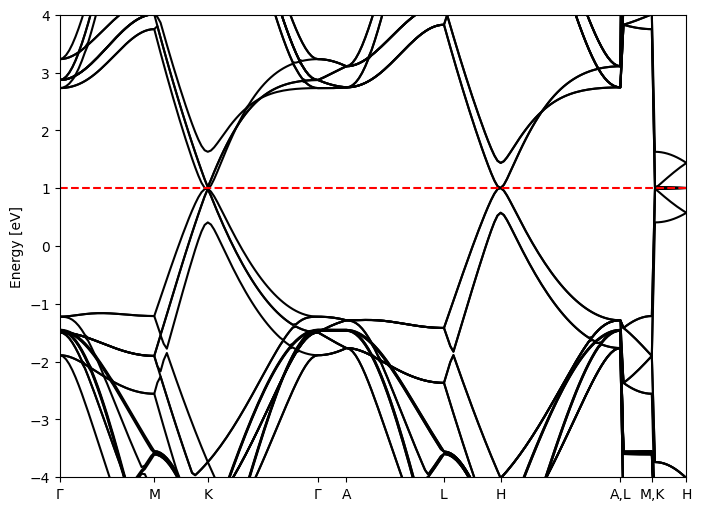

In [10]:
bp.plot(emin=-4, emax=4)

<Axes: ylabel='E - E${}_F$ [eV]'>

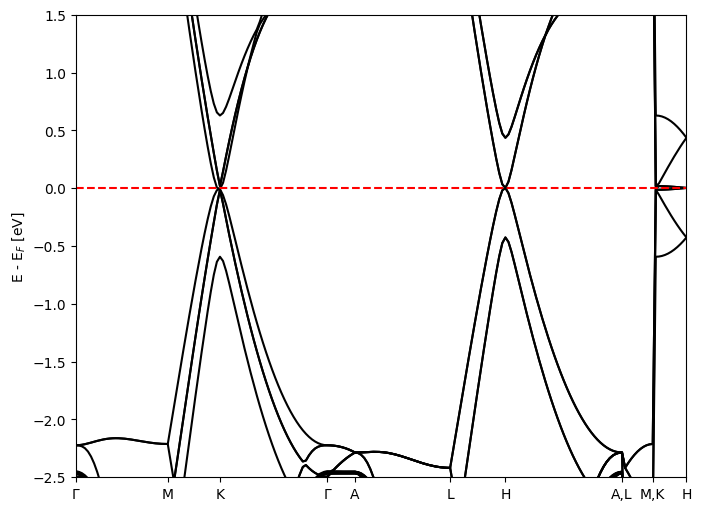

In [9]:
bp.plot(emin=-2.5, emax=1.5, center=True)